<a href="https://colab.research.google.com/github/Sanika2112/CODTECH-Task-01/blob/main/Task_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task - 01 : Implement linear regression to predict housing prices based on features like square footage, number of bedrooms, and location. Use a dataset like the Boston Housing dataset for training and evaluation.

## 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Loading and Exploring the Dataset

In [2]:
# Loading the Dataset
data = pd.read_csv('BostonHousing.csv')

# Display basic dataset information
print("Dataset Info:")
print(data.info())

print("\nFirst 5 rows of the dataset:")
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None

First 5 rows of the dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   

## 3. Checking for Missing Values and Handling Them

In [3]:
# Check for missing values
print("\nChecking for missing values:")
print(data.isnull().sum())

# Fill missing values for the 'rm' column if present
if 'rm' in data.columns:
    data['rm'].fillna(data['rm'].mean(), inplace=True)
    print("\nMissing values filled for 'rm' column.")

# Verify remaining missing values
print("\nRemaining missing values:")
print(data.isnull().sum())



Checking for missing values:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

Missing values filled for 'rm' column.

Remaining missing values:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


<ipython-input-3-7c60abe15134>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rm'].fillna(data['rm'].mean(), inplace=True)


## 4.Exploratory Data Analysis (EDA)

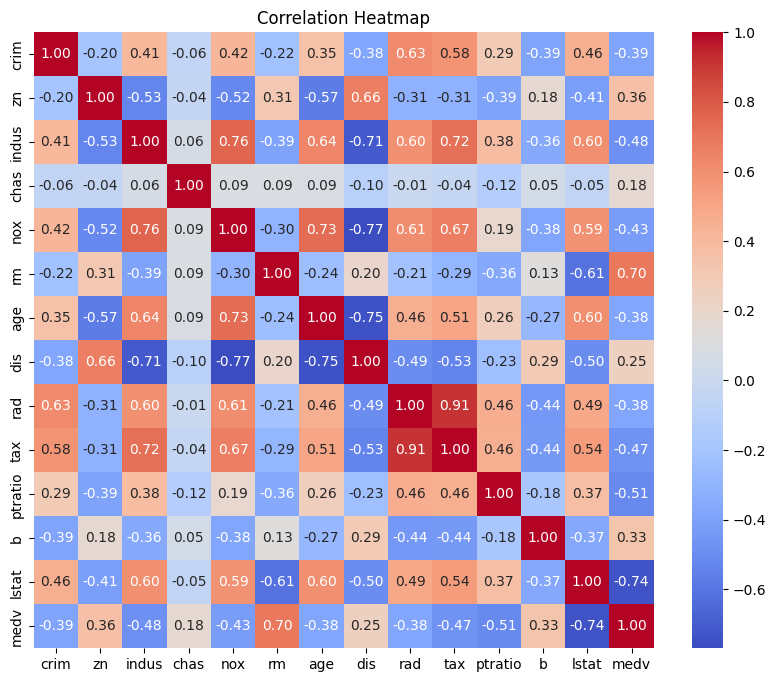

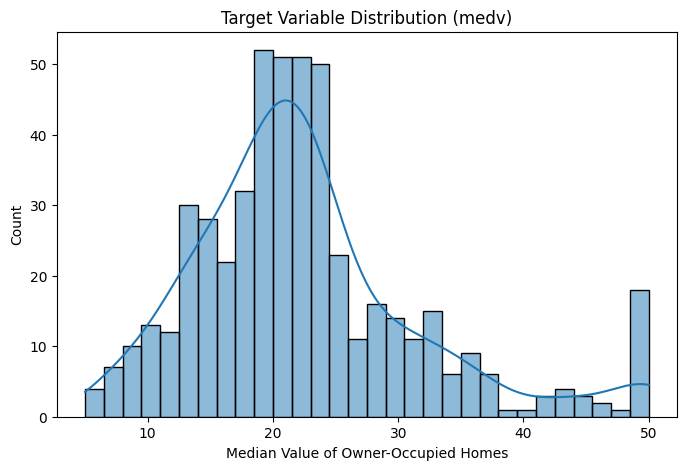

In [4]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Target Variable Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['medv'], kde=True, bins=30)
plt.title("Target Variable Distribution (medv)")
plt.xlabel("Median Value of Owner-Occupied Homes")
plt.show()


## 5. Feature scaling and splitting data

In [5]:
# Features and Target Variable
X = data.drop('medv', axis=1)
y = data['medv']

# Standardize features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 6. Training Linear Regression Model

In [6]:
# Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
linear_y_pred = linear_model.predict(X_test)


## 7.Evaluating the model

In [7]:
# Evaluate performance using metrics
linear_mae = mean_absolute_error(y_test, linear_y_pred)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_y_pred)

print("\nLinear Regression Performance:")
print(f"Mean Absolute Error (MAE): {linear_mae:.2f}")
print(f"Mean Squared Error (MSE): {linear_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {linear_rmse:.2f}")
print(f"R² Score: {linear_r2:.2f}")



Linear Regression Performance:
Mean Absolute Error (MAE): 3.21
Mean Squared Error (MSE): 24.40
Root Mean Squared Error (RMSE): 4.94
R² Score: 0.67


## Visualizing Results

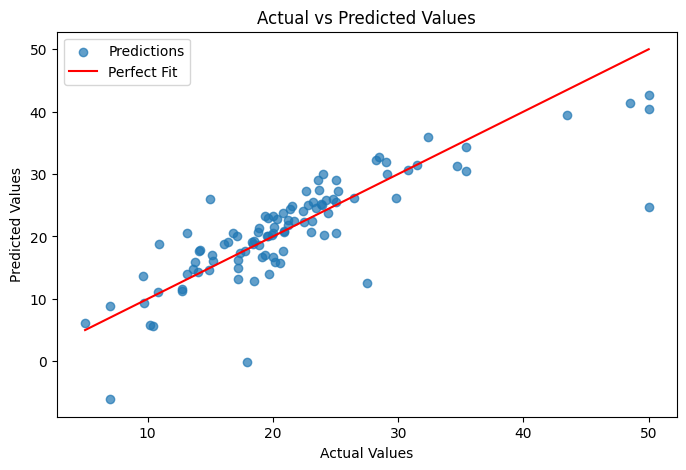

In [10]:
# Actual vs Predicted Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(y_test, linear_y_pred, alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Perfect Fit')
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()
